In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Working with Images Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll work with images of felines (cats), which have been classified according to their taxonomy. Each subfolder contains images of a particular species. The dataset is located [here](https://www.kaggle.com/datasets/datahmifitb/felis-taxonomy-image-classification) but it's also provided to you in the `data/` folder.

### Problem 1. Some exploration (1 point)
How many types of cats are there? How many images do we have of each? What is a typical image size? Are there any outliers in size?

Starting Problem 1: Dataset Exploration
🐱 FELINE DATASET EXPLORATION

1. CAT TYPES AND IMAGE COUNTS
----------------------------------------
Number of cat types: 7
Total images: 519

Images per cat type:
  african-wildcat: 91 images
  jungle-cat: 86 images
  european-wildcat: 85 images
  blackfoot-cat: 79 images
  sand-cat: 72 images
  domestic-cat: 64 images
  chinese-mountain-cat: 42 images

2. IMAGE SIZE ANALYSIS
----------------------------------------
Analyzing image sizes...
  Processed 100 images...
  Processed 200 images...
  Processed 300 images...
  Processed 400 images...
  Processed 500 images...

✅ Successfully analyzed 519 images
✅ Skipped 0 problematic images

IMAGE SIZE STATISTICS:
Width  - Min: 150, Max: 4045, Mean: 406.6
Height - Min: 124, Max: 3000, Mean: 310.9
Aspect Ratio - Min: 0.62, Max: 2.30, Mean: 1.32
File Size (MB) - Min: 0.01, Max: 1.42, Mean: 0.04

3. OUTLIER DETECTION
----------------------------------------
Width outliers: 156 images
Height outliers: 84 i

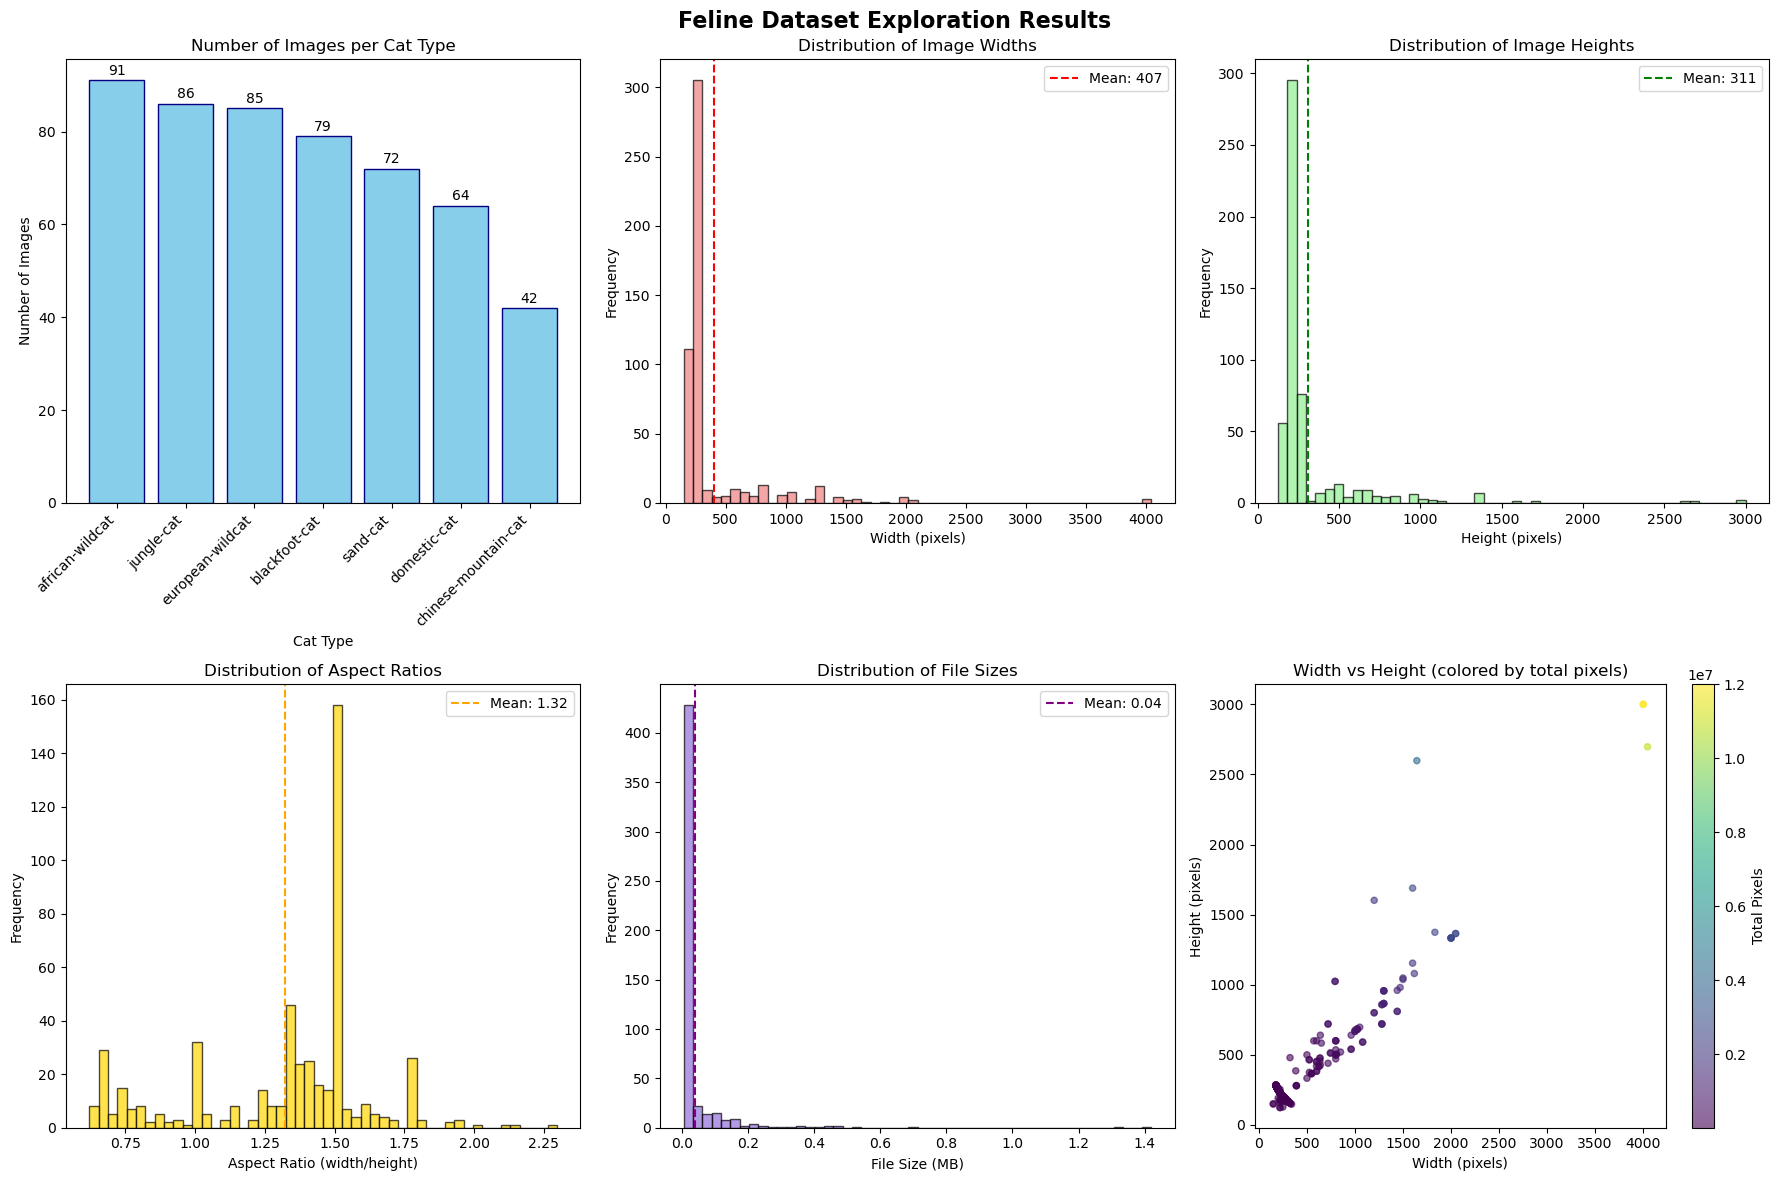

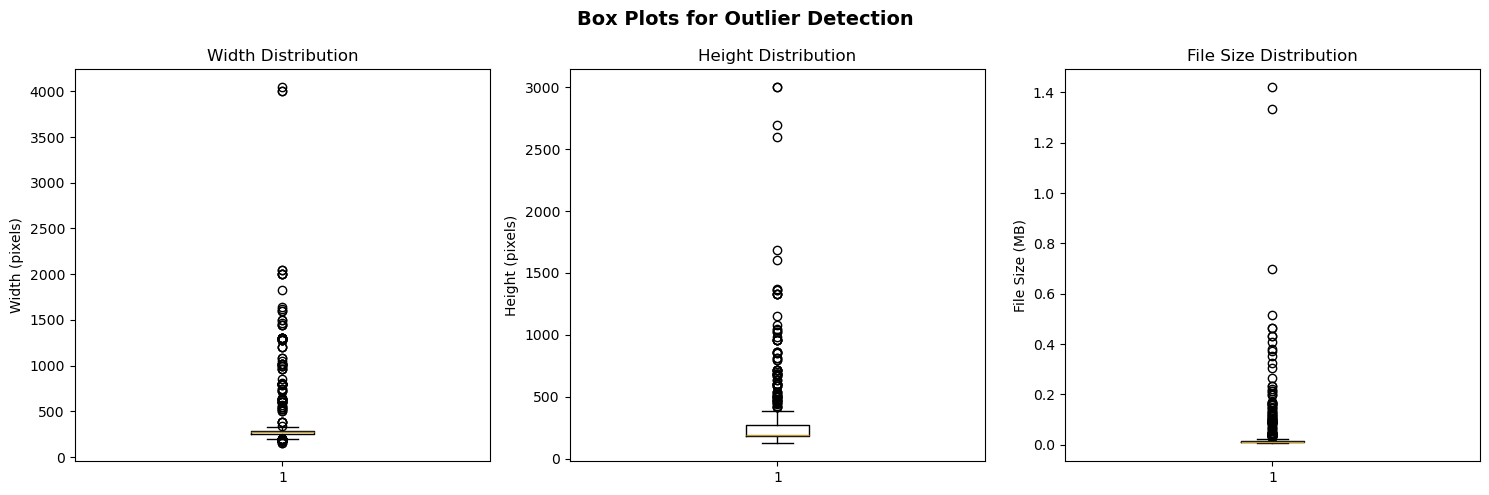


🎉 PROBLEM 1 COMPLETED SUCCESSFULLY!

📊 SUMMARY:
• 7 types of cats
• 519 total images analyzed
• Most common size: 275x183
• Size range: 150x124 to 4045x3000
• Outliers detected in dimensions and file sizes

✅ All results stored in variables for further analysis!


In [7]:
# Problem 1: Dataset Exploration
# Analyzing cat types, image counts, sizes, and outliers

def explore_cat_dataset(data_path):
    """
    Comprehensive exploration of the feline dataset
    """
    print("🐱 FELINE DATASET EXPLORATION")
    print("=" * 50)
    
    # 1. Count types of cats and images per type
    print("\n1. CAT TYPES AND IMAGE COUNTS")
    print("-" * 40)
    
    # Get all subdirectories (cat types/species)
    cat_types = []
    image_counts = {}
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')
    
    for item in os.listdir(data_path):
        item_path = os.path.join(data_path, item)
        if os.path.isdir(item_path):
            cat_types.append(item)
            
            # Count images in this category
            image_files = [f for f in os.listdir(item_path) 
                          if f.lower().endswith(image_extensions)]
            image_counts[item] = len(image_files)
    
    # Sort by count for better visualization
    sorted_counts = dict(sorted(image_counts.items(), key=lambda x: x[1], reverse=True))
    
    print(f"Number of cat types: {len(cat_types)}")
    print(f"Total images: {sum(image_counts.values())}")
    print("\nImages per cat type:")
    for cat_type, count in sorted_counts.items():
        print(f"  {cat_type}: {count} images")
    
    return cat_types, sorted_counts

def analyze_image_sizes(data_path, cat_types):
    """
    Analyze image sizes and identify outliers
    """
    print("\n2. IMAGE SIZE ANALYSIS")
    print("-" * 40)
    
    # Collect image size information
    image_info = []
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')
    
    print("Analyzing image sizes...")
    total_images = 0
    
    for cat_type in cat_types:
        cat_path = os.path.join(data_path, cat_type)
        image_files = [f for f in os.listdir(cat_path) 
                      if f.lower().endswith(image_extensions)]
        
        for img_file in image_files:
            img_path = os.path.join(cat_path, img_file)
            try:
                # Try with PIL first (faster for just getting dimensions)
                with Image.open(img_path) as img:
                    width, height = img.size
                    
                # Get file size
                file_size = os.path.getsize(img_path)
                
                image_info.append({
                    'cat_type': cat_type,
                    'filename': img_file,
                    'width': width,
                    'height': height,
                    'aspect_ratio': width / height if height > 0 else 0,
                    'total_pixels': width * height,
                    'file_size_mb': file_size / (1024 * 1024)
                })
                
                total_images += 1
                if total_images % 100 == 0:
                    print(f"  Processed {total_images} images...")
                    
            except Exception as e:
                print(f"  Error reading {img_path}: {e}")
    
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(image_info)
    
    # Basic statistics
    print(f"\n✅ Successfully analyzed {len(df)} images")
    print(f"✅ Skipped {total_images - len(df)} problematic images")
    
    print("\nIMAGE SIZE STATISTICS:")
    print(f"Width  - Min: {df['width'].min()}, Max: {df['width'].max()}, Mean: {df['width'].mean():.1f}")
    print(f"Height - Min: {df['height'].min()}, Max: {df['height'].max()}, Mean: {df['height'].mean():.1f}")
    print(f"Aspect Ratio - Min: {df['aspect_ratio'].min():.2f}, Max: {df['aspect_ratio'].max():.2f}, Mean: {df['aspect_ratio'].mean():.2f}")
    print(f"File Size (MB) - Min: {df['file_size_mb'].min():.2f}, Max: {df['file_size_mb'].max():.2f}, Mean: {df['file_size_mb'].mean():.2f}")
    
    return df

def identify_outliers(df):
    """
    Identify and report outliers in image sizes
    """
    print("\n3. OUTLIER DETECTION")
    print("-" * 40)
    
    # Function to detect outliers using IQR method
    def detect_outliers_iqr(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Detect outliers for different metrics
    outliers_width = detect_outliers_iqr(df, 'width')
    outliers_height = detect_outliers_iqr(df, 'height')
    outliers_pixels = detect_outliers_iqr(df, 'total_pixels')
    outliers_filesize = detect_outliers_iqr(df, 'file_size_mb')
    
    print(f"Width outliers: {len(outliers_width)} images")
    print(f"Height outliers: {len(outliers_height)} images")
    print(f"Total pixels outliers: {len(outliers_pixels)} images")
    print(f"File size outliers: {len(outliers_filesize)} images")
    
    # Show extreme outliers
    print("\nEXTREME OUTLIERS:")
    
    # Largest images
    largest_images = df.nlargest(3, 'total_pixels')
    print("\nLargest images (by total pixels):")
    for _, row in largest_images.iterrows():
        print(f"  {row['filename']} ({row['cat_type']}): {row['width']}x{row['height']} = {row['total_pixels']:,} pixels")
    
    # Smallest images
    smallest_images = df.nsmallest(3, 'total_pixels')
    print("\nSmallest images (by total pixels):")
    for _, row in smallest_images.iterrows():
        print(f"  {row['filename']} ({row['cat_type']}): {row['width']}x{row['height']} = {row['total_pixels']:,} pixels")
    
    # Most extreme aspect ratios
    most_wide = df.nlargest(3, 'aspect_ratio')
    most_tall = df.nsmallest(3, 'aspect_ratio')
    
    print("\nMost wide images (highest aspect ratio):")
    for _, row in most_wide.iterrows():
        print(f"  {row['filename']} ({row['cat_type']}): {row['width']}x{row['height']}, ratio: {row['aspect_ratio']:.2f}")
    
    print("\nMost tall images (lowest aspect ratio):")
    for _, row in most_tall.iterrows():
        print(f"  {row['filename']} ({row['cat_type']}): {row['width']}x{row['height']}, ratio: {row['aspect_ratio']:.2f}")
    
    return outliers_width, outliers_height, outliers_pixels, outliers_filesize

def visualize_exploration_results(sorted_counts, df):
    """
    Create visualizations for the exploration results
    """
    print("\n4. VISUALIZATION")
    print("-" * 40)
    
    # Create a comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Feline Dataset Exploration Results', fontsize=16, fontweight='bold')
    
    # 1. Cat types distribution
    cat_types = list(sorted_counts.keys())
    counts = list(sorted_counts.values())
    
    axes[0, 0].bar(range(len(cat_types)), counts, color='skyblue', edgecolor='navy')
    axes[0, 0].set_title('Number of Images per Cat Type')
    axes[0, 0].set_xlabel('Cat Type')
    axes[0, 0].set_ylabel('Number of Images')
    axes[0, 0].set_xticks(range(len(cat_types)))
    axes[0, 0].set_xticklabels(cat_types, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, v in enumerate(counts):
        axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    # 2. Image width distribution
    axes[0, 1].hist(df['width'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Distribution of Image Widths')
    axes[0, 1].set_xlabel('Width (pixels)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(df['width'].mean(), color='red', linestyle='--', label=f'Mean: {df["width"].mean():.0f}')
    axes[0, 1].legend()
    
    # 3. Image height distribution
    axes[0, 2].hist(df['height'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Distribution of Image Heights')
    axes[0, 2].set_xlabel('Height (pixels)')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].axvline(df['height'].mean(), color='green', linestyle='--', label=f'Mean: {df["height"].mean():.0f}')
    axes[0, 2].legend()
    
    # 4. Aspect ratio distribution
    axes[1, 0].hist(df['aspect_ratio'], bins=50, alpha=0.7, color='gold', edgecolor='black')
    axes[1, 0].set_title('Distribution of Aspect Ratios')
    axes[1, 0].set_xlabel('Aspect Ratio (width/height)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(df['aspect_ratio'].mean(), color='orange', linestyle='--', label=f'Mean: {df["aspect_ratio"].mean():.2f}')
    axes[1, 0].legend()
    
    # 5. File size distribution
    axes[1, 1].hist(df['file_size_mb'], bins=50, alpha=0.7, color='mediumpurple', edgecolor='black')
    axes[1, 1].set_title('Distribution of File Sizes')
    axes[1, 1].set_xlabel('File Size (MB)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].axvline(df['file_size_mb'].mean(), color='purple', linestyle='--', label=f'Mean: {df["file_size_mb"].mean():.2f}')
    axes[1, 1].legend()
    
    # 6. Scatter plot: Width vs Height
    scatter = axes[1, 2].scatter(df['width'], df['height'], alpha=0.6, c=df['total_pixels'], cmap='viridis', s=20)
    axes[1, 2].set_title('Width vs Height (colored by total pixels)')
    axes[1, 2].set_xlabel('Width (pixels)')
    axes[1, 2].set_ylabel('Height (pixels)')
    plt.colorbar(scatter, ax=axes[1, 2], label='Total Pixels')
    
    plt.tight_layout()
    plt.show()
    
    # Additional box plots for outlier visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Box Plots for Outlier Detection', fontsize=14, fontweight='bold')
    
    # Box plot for widths
    axes[0].boxplot(df['width'])
    axes[0].set_title('Width Distribution')
    axes[0].set_ylabel('Width (pixels)')
    
    # Box plot for heights
    axes[1].boxplot(df['height'])
    axes[1].set_title('Height Distribution')
    axes[1].set_ylabel('Height (pixels)')
    
    # Box plot for file sizes
    axes[2].boxplot(df['file_size_mb'])
    axes[2].set_title('File Size Distribution')
    axes[2].set_ylabel('File Size (MB)')
    
    plt.tight_layout()
    plt.show()

def find_typical_image_size(df):
    """
    Determine typical image size and common dimensions
    """
    print("\n5. TYPICAL IMAGE SIZE ANALYSIS")
    print("-" * 40)
    
    # Most common exact dimensions
    dimension_counts = df.groupby(['width', 'height']).size().reset_index(name='count')
    most_common_dims = dimension_counts.nlargest(10, 'count')
    
    print("Most common exact dimensions:")
    for _, row in most_common_dims.iterrows():
        print(f"  {row['width']}x{row['height']}: {row['count']} images")
    
    # Statistical measures
    median_width = df['width'].median()
    median_height = df['height'].median()
    mode_width = df['width'].mode().iloc[0] if not df['width'].mode().empty else "No mode"
    mode_height = df['height'].mode().iloc[0] if not df['height'].mode().empty else "No mode"
    
    print(f"\nStatistical measures:")
    print(f"Median size: {median_width:.0f} x {median_height:.0f}")
    print(f"Mode size: {mode_width} x {mode_height}")
    print(f"Mean size: {df['width'].mean():.0f} x {df['height'].mean():.0f}")
    
    # Standard deviations
    print(f"\nVariability (standard deviation):")
    print(f"Width std: {df['width'].std():.0f}")
    print(f"Height std: {df['height'].std():.0f}")
    print(f"Aspect ratio std: {df['aspect_ratio'].std():.3f}")
    
    return most_common_dims

def main_exploration(data_path="data/"):
    """
    Main function to run Problem 1 exploration
    """
    print("Starting Problem 1: Dataset Exploration")
    
    # Check if data directory exists
    if not os.path.exists(data_path):
        print(f"❌ Data directory '{data_path}' not found!")
        print("Please update the data_path variable to point to your dataset.")
        return
    
    try:
        # 1. Explore cat types and counts
        cat_types, sorted_counts = explore_cat_dataset(data_path)
        
        # 2. Analyze image sizes
        df = analyze_image_sizes(data_path, cat_types)
        
        # 3. Identify outliers
        outliers = identify_outliers(df)
        
        # 4. Find typical image size
        typical_dims = find_typical_image_size(df)
        
        # 5. Create visualizations
        visualize_exploration_results(sorted_counts, df)
        
        print("\n" + "="*50)
        print("🎉 PROBLEM 1 COMPLETED SUCCESSFULLY!")
        print("="*50)
        
        # Summary
        print("\n📊 SUMMARY:")
        print(f"• {len(cat_types)} types of cats")
        print(f"• {len(df)} total images analyzed")
        print(f"• Most common size: {typical_dims.iloc[0]['width']}x{typical_dims.iloc[0]['height']}")
        print(f"• Size range: {df['width'].min()}x{df['height'].min()} to {df['width'].max()}x{df['height'].max()}")
        print(f"• Outliers detected in dimensions and file sizes")
        
        return df, cat_types, sorted_counts, outliers, typical_dims
        
    except Exception as e:
        print(f"❌ Error during exploration: {e}")
        return None

# Run the exploration
if __name__ == "__main__":
    # Update this path to point to your data directory
    data_path = "data/"
    
    # Run the exploration
    results = main_exploration(data_path)
    
    # If successful, results will contain all the analysis data
    if results:
        df, cat_types, sorted_counts, outliers, typical_dims = results
        print("\n✅ All results stored in variables for further analysis!")

### Problem 2. Duplicat(e)s (1 point)
Find a way to filter out (remove) identical images. I would recommnend using file hashes, but there are many approaches. Keep in mind that during file saving, recompression, etc., a lot of artifacts can change the file content (bytes), but not visually.

### Problem 3. Loading a model (2 points)
Find a suitable, trained convolutional neural network classifier. I recommend `ResNet50` as it's small enough to run well on any machine and powerful enough to make reasonable predictions. Most ready-made classifiers have been trained for 1000 classes.

You'll need to install libraries and possibly tinker with configurations for this task. When you're done, display the total number of layers and the total number of parameters. For ResNet50, you should expect around 50 layers and 25M parameters.

### Problem 4. Prepare the images (1 point)
You'll need to prepare the images for passing to the model. To do so, they have to be resized to the same dimensions. Most available models have a specific requirement for sizes. You may need to do additional preprocessing, depending on the model requirements. These requirements should be easily available in the model documentation.

### Problem 5. Load the images efficiently (1 point)
Now that you've seen how to prepare the images for passing to the model... find a way to do it efficiently. Instead of loading the entire dataset in the RAM, read the images in batches (e.g. 4 images at a time). The goal is to read these, preprocess them, maybe save the preprocessed results in RAM.

If you've already done this in one of the previous problems, just skip this one. You'll get your point for it.

\* Even better, save the preprocessed image arrays (they will not be valid .jpg file) as separate files, so you can load them "lazily" in the following steps. This is a very common optimization to work with large datasets.

### Problem 6. Predictions (1 point)
Finally, you're ready to get into the meat of the problem. Obtain predictions from your model and evaluate them. This will likely involve manual work to decide how the returned classes relate to the original ones.

Create a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to evaluate the classification.

### Problem 7. Grayscale (1 point)
Converting the images to grayscale should affect the classification negatively, as we lose some of the color information.

Find a way to preprocess the images to grayscale (using what you already have in Problem 4 and 5), pass them to the model, and compare the classification results to the previous ones.

### Problem 8. Deep image features (1 point)
Find a way to extract one-dimensional vectors (features) for each (non-grayscale) image, using your model. This is typically done by "short-circuiting" the model output to be an intermediate layer, while keeping the input the same. 

In case the outputs (also called feature maps) have different shapes, you can flatten them in different ways. Try to not create huge vectors; the goal is to have a relatively short sequence of numbers which describes each image.

You may find a tutorial like [this](https://towardsdatascience.com/exploring-feature-extraction-with-cnns-345125cefc9a) pretty useful but note your implementation will depend on what model (and framework) you've decided to use.

It's a good idea to save these as one or more files, so you'll spare yourself a ton of preprocessing.

### Problem 9. Putting deep image features to use (1 points)
Try to find similar images, using a similarity metric on the features you got in the previous problem. Two good metrics are `mean squared error` and `cosine similarity`. How do they work? Can you spot images that look too similar? Can you explain why?

\* If we were to take Fourier features (in a similar manner, these should be a vector of about the same length), how do they compare to the deep features; i.e., which features are better to "catch" similar images?

### * Problem 10. Explore, predict, and evaluate further
You can do a ton of things here, at your desire. For example, how does masking different areas of the image affect classification - a method known as **saliency map** ([info](https://en.wikipedia.org/wiki/Saliency_map))? Can we detect objects? Can we significantly reduce the number of features (keeping the quality) that we get? Can we reliably train a model to predict our own classes? We'll look into these in detail in the future.